# Introduction 

The goal of this project is to improve data analysis skills as well as demonstrate their application. For this project I work with data from Twitter, one of the key social media platforms. My goal is to demonstrate data analysis, from data preprocessing and cleaning, to visualization of results.

Due to the fact that from Twitter there was <a href="https://twitter.com/XDevelopers/status/1621026986784337922?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembed%7Ctwterm%5E1621026986784337922%7Ctwgr%5Eaaf7e61c3dc269ea7f16ef0f49f57606a935af83%7Ctwcon%5Es1_&ref_url=https%3A%2F%2Fwww.theverge.com%2F2023%2F2%2F2%2F23582615%2Ftwitter-removing-free-api-developer-apps-price-announcement">removed</a> free access to API, I used Apify scraping web tool. I collected posts from 09/07/2023 to 07/21/2023 that contained major countries as keywords.

# Data Cleaning

This section of code performs important data cleaning and preprocessing operations. First, the data is loaded from the CSV file. The DataFrame columns are then renamed for better readability. The date column is converted to the correct format. Duplicate rows are removed to avoid redundant data. 'NaN' values are replaced with 'None', making it easier to deal with missing data. Finally, the cleaned data is saved in a new CSV file for further analysis and use. All these steps helped bring the data into a more convenient form for subsequent work.

In [ ]:
# !pip install pandas 
# !pip install numpy

In [1]:
import pandas as pd
import numpy
# pd.set_option('display.max_rows', None)

df = pd.read_csv('data.csv')
df #Original dataset

,id,user/can_dm,user/can_media_tag,user/created_at,user/default_profile_image,user/description,user/fast_followers_count,user/favourites_count,user/followers_count,user/friends_count,...,media/1/gif_url,media/1/media_url,media/1/type,media/1/video_url,media/2/media_url,media/2/type,media/2/video_url,media/3/media_url,media/3/type,media/3/video_url
0,1.681060e+18,True,True,2022-04-04T20:15:55.000Z,False,"Chief Memer, woman and immigrant you don’t wan...",0,125057,202135,7828,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.681950e+18,True,True,2017-08-19T14:59:15.000Z,False,Dedicated to the preservation and revival of t...,0,45969,384876,136,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.678260e+18,False,True,2020-07-16T15:38:18.000Z,False,Daily-Choices is an online entertainment and l...,0,0,4112,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.681740e+18,True,True,2017-08-19T14:59:15.000Z,False,Dedicated to the preservation and revival of t...,0,45969,384876,136,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.682350e+18,True,True,2017-08-19T14:59:15.000Z,False,Dedicated to the preservation and revival of t...,0,45969,384876,136,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2954,1.682400e+18,False,True,2017-02-22T20:43:40.000Z,False,"Mom. Wife. Nurse. Film extra. From Fargo, ND, ...",0,88835,12203,12120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2955,1.682080e+18,True,False,2020-03-26T08:36:12.000Z,False,$LCID Long term investor . Best EV Car company...,0,7739,443,259,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2956,1.681490e+18,False,True,2022-02-02T16:13:49.000Z,False,Afghan Broadcasting Network is the mirror of m...,0,12,49523,2,...,NaN,https://pbs.twimg.com/media/F1XYNnuacAIUQmM.jpg,photo,NaN,https://pbs.twimg.com/media/F1XYNnsacAEcmd_.jpg,photo,NaN,https://pbs.twimg.com/media/F1XYNn1aEAMWIz4.jpg,photo,NaN
2957,1.682390e+18,True,False,2019-07-20T23:11:34.000Z,False,|PR| Social Media Manager| Send Business Email...,0,357772,309489,10749,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The original dataset has almost 3000 rows and 95 columns. Most of the cells have useless information for analysis, such as the ability to replay to users, or are simply empty. For myself, I highlighted that to form a new dataset containing useful information, the following columns can provide: Post ID, Date of publication of the post, Username, the text of the tweet itself, the number of likes, media from the post, and the user’s location. 

The original column names are extremely inconvenient and have been changed. I preferred to take users’ location from their profiles because users often write it there rather than mark the geolocation of their post. I decided to leave links to the original tweets in the text so that in the future I could check posts of interest (at the moment this is no longer relevant due to the renaming of Twitter).

In [2]:
# Mapping for renaming
mapping = {'id': 'ID',
           'user/screen_name': 'User',
           'full_text': 'Tweet',
           'created_at': 'Date',
           'user/location': 'Location',
           'favorite_count': 'Likes',
           'media/0/media_url': 'Media'
           }

# Read CSV file and use only nesseccary columns
df = pd.read_csv('data.csv', usecols = ['id', 
                                        'user/screen_name', 
                                        'full_text', 
                                        'created_at', 
                                        'user/location', 
                                        'favorite_count', 
                                        'media/0/media_url'] )

# Rename columns
df.rename(columns=mapping, inplace=True)

# Convert Datetime format to Date
df['Date'] = pd.to_datetime(df['Date']).dt.date

# Remove duplicates
df.drop_duplicates(subset='Tweet')

# Replace 'NaN' values with 'None'
df = df.where(pd.notnull(df), None)

# Save file 
df.to_csv('DataFrame.csv', index=False)

df


,ID,Location,User,Tweet,Date,Likes,Media
0,1.681060e+18,"New York, USA",ImMeme0,Omg I’m dying. This is Belgium military and ye...,2023-07-17,21981,https://pbs.twimg.com/ext_tw_video_thumb/16810...
1,1.681950e+18,United States,archi_tradition,"Ghent, Belgium 🇧🇪 https://t.co/QgJJFsrHI3",2023-07-20,28255,https://pbs.twimg.com/media/F1eA5YtXsAArEzM.jpg
2,1.678260e+18,None,DailyChoicesMag,People all around the world know Americans whe...,2023-07-10,184,None
3,1.681740e+18,United States,archi_tradition,"Bruges, Belgium 🇧🇪 https://t.co/Ku3WiC2zlo",2023-07-19,25694,https://pbs.twimg.com/media/F1a_lrjWIAE4l7L.jpg
4,1.682350e+18,United States,archi_tradition,"Utrecht, Netherlands 🇳🇱 https://t.co/23u7gWV9A5",2023-07-21,11620,https://pbs.twimg.com/media/F1jnVcqXsAEjxXR.jpg
...,...,...,...,...,...,...,...
2954,1.682400e+18,"British Columbia, Canada",cheryllausch,@bourliz777 @marklevinshow @lsferguson Interes...,2023-07-21,9,None
2955,1.682080e+18,None,rocckosw23,You can now rent an electric vehicle in Saudi ...,2023-07-20,26,None
2956,1.681490e+18,None,afbnpashto,عکسونه؛ د کعبې شریفې د پوښ نوي کولو جریان\n\n#...,2023-07-19,140,https://pbs.twimg.com/media/F1XYNnoaMAAvvzv.jpg
2957,1.682390e+18,Beno City,BenopaOnyx1,I don’t blame those who say $1M be normal smh ...,2023-07-21,241,None


I encountered a serious issue related to users' location. The fact is that the user can write absolutely anything in the location field. As a result, people living in the US may have different spellings of the country's name, including city names, or just some nonsense. Due to the fact that not all users write the exact location, it is most rational to configure these fields to display only the name of the country, and erase everything that has nothing to do with the location.

To solve this problem I decided to use the <a href="https://geopy.readthedocs.io/en/stable/" target="_blank">Geopy</a> library. It can recognize countries by city names even in different languages, which makes it very useful. However, there is a big problem. Geopy can find a place where there is actually nothing. Because of this, I had to find a way to detect the presence of any location. For this task I used the <a href="https://huggingface.co/ml6team/bert-base-uncased-city-country-ner?text=Hi%2C+I+am+Kermit+and+I+live+in+Switzerland" target="_blank">ml6team/bert-base-uncased-city-country-ner</a> model from Huggingface. 

Another thing is that many people use “Earth” as their location. It's hard to tell if they're just using this as a trend or if they actually live in the same city in Texas, USA, so I made an exception for this one. Also, some people manage to write nonsense in the style of "London and South France", which simply causes an error when executed. Such statuses with “uncertainties” will simply be replaced with 'None'.

After completing these steps, I received a dataset with which I can conveniently work and analyze the data.

In [27]:
from transformers import pipeline
from geopy.geocoders import Nominatim
from transformers import AutoTokenizer, AutoModelForTokenClassification

tokenizer = AutoTokenizer.from_pretrained("ml6team/bert-base-uncased-city-country-ner")

model = AutoModelForTokenClassification.from_pretrained("ml6team/bert-base-uncased-city-country-ner")

def get_country_from_city(city_name):
    
    if city_name.lower() == "earth":
        return "None"
    
    geolocator = Nominatim(user_agent="geoapiExercises")
    location = geolocator.geocode(city_name, language='en')
    if location is not None:
        return location.address.split(",")[-1].strip()
    else:
        return 'None' 

nlp = pipeline('ner', model=model, tokenizer=tokenizer, aggregation_strategy="simple")

for i, location in enumerate(df['Location']):
    try:
        if location is not None:
            entities = nlp(location.lower())
            if len(entities) != 0:
                df.at[i, 'Location'] = get_country_from_city(location)
            else:
                df.at[i, 'Location'] = 'None'
        else:
            df.at[i, 'Location'] = 'None'
            
    except Exception as e:
        df.at[i, 'Location'] = 'None'
    
df.to_csv('UpdatedDF.csv', index=False)
df = pd.read_csv('UpdatedDF.csv')
# df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

df = df.where(pd.notnull(df), None)
df

,ID,Location,User,Tweet,Date,Likes,Media
0,1.681060e+18,United States,ImMeme0,Omg I’m dying. This is Belgium military and ye...,2023-07-17,21981,https://pbs.twimg.com/ext_tw_video_thumb/16810...
1,1.681950e+18,United States,archi_tradition,"Ghent, Belgium 🇧🇪 https://t.co/QgJJFsrHI3",2023-07-20,28255,https://pbs.twimg.com/media/F1eA5YtXsAArEzM.jpg
2,1.678260e+18,None,DailyChoicesMag,People all around the world know Americans whe...,2023-07-10,184,None
3,1.681740e+18,United States,archi_tradition,"Bruges, Belgium 🇧🇪 https://t.co/Ku3WiC2zlo",2023-07-19,25694,https://pbs.twimg.com/media/F1a_lrjWIAE4l7L.jpg
4,1.682350e+18,United States,archi_tradition,"Utrecht, Netherlands 🇳🇱 https://t.co/23u7gWV9A5",2023-07-21,11620,https://pbs.twimg.com/media/F1jnVcqXsAEjxXR.jpg
...,...,...,...,...,...,...,...
2954,1.682400e+18,Canada,cheryllausch,@bourliz777 @marklevinshow @lsferguson Interes...,2023-07-21,9,None
2955,1.682080e+18,None,rocckosw23,You can now rent an electric vehicle in Saudi ...,2023-07-20,26,None
2956,1.681490e+18,None,afbnpashto,عکسونه؛ د کعبې شریفې د پوښ نوي کولو جریان\n\n#...,2023-07-19,140,https://pbs.twimg.com/media/F1XYNnoaMAAvvzv.jpg
2957,1.682390e+18,Italy,BenopaOnyx1,I don’t blame those who say $1M be normal smh ...,2023-07-21,241,None


# Data Analysis and Visualization

## Most mentioned countries

Counting country mentions was one of the main reasons why I scraped the data using the main countries as keywords. I could have just made a list of countries, but I decided to go further. First I extract alpha-2 country codes and their names from pycountry and make a dictionary from them. This library is very effective, but imperfect. Some countries have official names instead of the main one, which can make searching difficult. Due to this, I use <a href="https://pypi.org/project/country-converter/" target="_blank">country converter</a> to fix country names. For the UK and US I make an exception to check for their alpha-2 codes because these two countries are very often mentioned in such a short form. The check for this must be done with upper case so as not to count all pronouns in the text. I also use  <a href="https://pypi.org/project/fuzzywuzzy/" target="_blank">fuzzywuzzy</a> for them so I don't miss spellings like U.S.A., U.K. etc.

Next, I go through the tweets and count the mentions of countries, after which I build a graph.

In [22]:
#!pip install country_converter --upgrade
#!pip install fuzzywuzzy

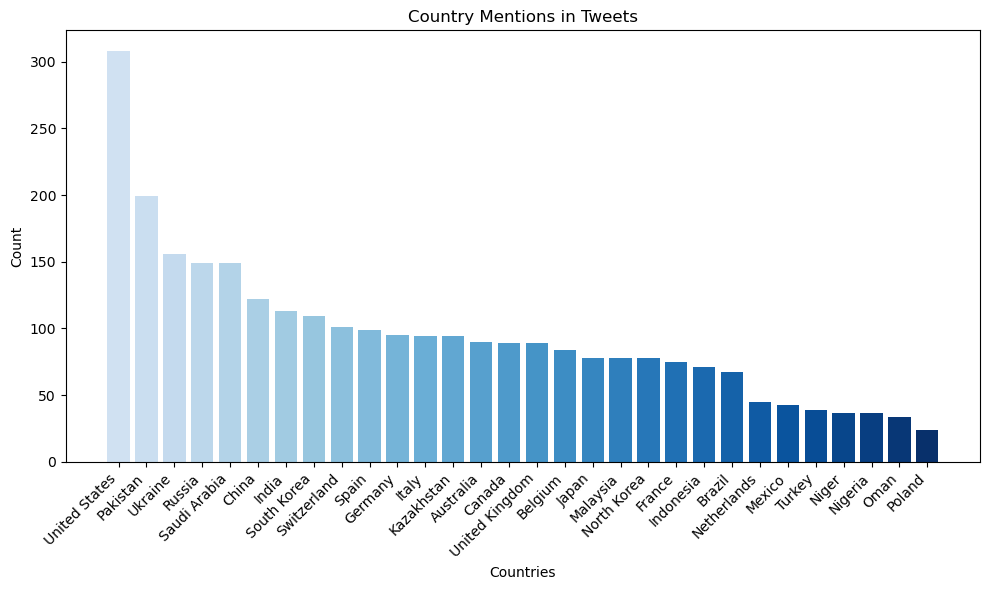

In [4]:
import pycountry
import numpy as np
import matplotlib.pyplot as plt
import country_converter as coco
from collections import OrderedDict
from fuzzywuzzy import fuzz, process

# Create a dictionary to match the full and abbreviated names of countries
short_to_full_names = {country.alpha_2: country.name for country in pycountry.countries}

# Fix the dictionary
for i in short_to_full_names:
    if len(short_to_full_names[i].split()) > 1:
        short_to_full_names[i] = coco.convert(names=short_to_full_names[i], to='name_short')

# Remove parts of some oficial names which weren't fixed
for c in short_to_full_names:
    [short_to_full_names[i].split(',')[0].strip() for i in short_to_full_names]

countries = []
country_counts = {}
exeptions = ['United States', 'United Kingdom']

for country_code, country_name in short_to_full_names.items():
    
    country_counts[country_name] = 0
    
    for tweet in df['Tweet']:
        if country_name.lower() in tweet.lower():
            country_counts[country_name] += 1
        elif country_name in exeptions:
            similarity = fuzz.partial_ratio(country_code, tweet)
            if similarity >= 90:
                country_counts[country_name] += 1

# Make a decending order 
country_counts = OrderedDict(sorted(country_counts.items(), key=lambda t: t[1], reverse=True))

# Removing elements with null values from the dictionary
country_counts_nonzero = {country: count for country, count in country_counts.items() if count > 0}

# # Display the result
# for country, count in country_counts.items():
#     print(f"{country}: {count}")
    
# Remove items with zero values from the dictionary and those with less than 20 occurrences
country_counts_filtered = {country: count for country, count in country_counts.items() if count > 0 and count >= 20}

# Create a bar chart with a gradient of colors
countries = list(country_counts_filtered.keys())
counts = list(country_counts_filtered.values())

plt.figure(figsize=(10, 6))

colors = plt.cm.Blues(np.linspace(0.2, 1, len(countries)))  # Gradient from dark blue to light blue

bars = plt.bar(countries, counts, color=colors)

plt.xticks(rotation=45, ha='right')  # Align country names to the right
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Country Mentions in Tweets')

plt.tight_layout()
plt.show()

## The most liked posts

Since I'm dealing with a social network, one of the basic things would be to check the most liked posts.

In [4]:
# Display full text
pd.set_option('display.max_colwidth', None)

# Sort the DataFrame by the 'Likes' column in descending order and get the 10 most liked posts

# Сортируем DataFrame по столбцу 'Likes' в порядке убывания и получаем 10 наиболее залайканных постов
top_10_likes = df.sort_values(by='Likes', ascending=False).head(10)

# Reset the current index and create a new index from 1 to 10
top_10_likes.reset_index(drop=True, inplace=True)
top_10_likes.index = top_10_likes.index + 1

top_10_likes

,ID,Location,User,Tweet,Date,Likes,Media
1,1.682160e+18,"Pittsburgh, PA",DailyLoud,Rubi Rose in Italy right now 🇮🇹 📸 https://t.co/ORkXQlgvbH,2023-07-20,150833,https://pbs.twimg.com/media/F1g-jy3XwAA-qI_.jpg
2,1.681520e+18,None,viraltakes,"A 21 year old girl in Brazil escaped a robbery because she had picture of BTS Jin in her cellphone.\n\n— The Robber snatched her phone but when he saw JIN’s picture, he thought her boyfriend is in military and returned her phone and ran away. https://t.co/KRkN58B675",2023-07-19,122504,https://pbs.twimg.com/media/F1X4PNdaAAAuCyp.jpg
3,1.681690e+18,"Pittsburgh, PA",DailyLoud,Woman drags activist by the hair to stop her from blocking traffic in Germany 😳 https://t.co/LvvniEYjsX,2023-07-19,119826,https://pbs.twimg.com/media/F1aSfC5WIAAUd2x.jpg
4,1.679190e+18,press[at]dexerto.com,Dexerto,Twitch streamer experiencing racism in Belgium https://t.co/7zpxOlRH97,2023-07-12,67800,https://pbs.twimg.com/amplify_video_thumb/1679165432303960064/img/7Slirh45tTidMeoX.jpg
5,1.681990e+18,Support and tips,gunsnrosesgirl3,"In the village of Sirmione on lake Garda, Italy, there is a house covered in bougainvillea https://t.co/KORQXUXon8",2023-07-20,60699,https://pbs.twimg.com/media/F1edqx0X0AAt7ep.jpg
6,1.682380e+18,None,JYPETWICE_JAPAN,本日はMステで私たちMISAMOのパフォーマンスを初めて披露しました！本当に緊張しましたが、お届けできて幸せです💕\n\nステージを見てくださったみなさん、ありがとうございました！明日からのショーケースも頑張ります✨\n\n#MISAMO #Donottouch #Mステ #TWICE https://t.co/YZfuay2Y26,2023-07-21,56218,https://pbs.twimg.com/media/F1kBakiacAAcrs8.jpg
7,1.682030e+18,None,simonateba,"BREAKING - EXPLOSIVE: @RobertKennedyJr puts Democratic Congress members trying to censor him in their place with fiery open remarks during a hearing to expose censorship. It's shocking that in the United States of America, people are being censored for speaking the truth! WATCH! https://t.co/MKQMk2INAu",2023-07-20,53776,https://pbs.twimg.com/amplify_video_thumb/1682026785448558592/img/c7ThKddI_30TV66P.jpg
8,1.681670e+18,"England, United Kingdom",PurelyFootball,"𝙄𝙣 𝟮𝟬𝟭𝟰, André Schurrle was a world champion with Germany at the World Cup in Brazil, with 3 goals scored in 6 appearances. \n\n𝟵 𝙮𝙚𝙖𝙧𝙨 𝙡𝙖𝙩𝙚𝙧, he has already retired from football at 29 𝘆𝗲𝗮𝗿𝘀-𝗼𝗹𝗱 after a last stint with Spartak Moscow and found a new direction in his life; the Wim Hof method, one of the 𝗺𝗼𝘀𝘁 𝗱𝗶𝗳𝗳𝗶𝗰𝘂𝗹𝘁 endurance challenges in the world. \n\nHe climbed with his bare torso the Sniezka Mountains, the highest point in the Czech Republic at 1,603 meters above sea level, and he describes it himself on his Instagram: \n\n🗣 ""The last minutes I couldn't feel anything and I had to find something deep inside me to keep going. An experience I will never forget! -19 degrees, 100 km/h wind in our faces, heavy snow and rain. What I learned... my body and I are stronger than I thought if I put my mind and soul into it I can do it all.” 😳",2023-07-19,52745,https://pbs.twimg.com/media/F1Z8XOGXwAI3U8e.jpg
9,1.682380e+18,None,ErlingHaaland,"Hello from Japan, guys! 🇯🇵😁\nThanks for all the kind birthday wishes! 💙 https://t.co/OhSzs45cHB",2023-07-21,47958,https://pbs.twimg.com/media/F1kGFaSWcAIeoWx.jpg
10,1.680660e+18,eurofootmedia@gmail.com,eurofootcom,👨‍👩‍👧‍👦❤️ Rúben Neves says the biggest reason behind his move to Saudi Arabia was to give his family a life he always dreamed of. https://t.co/ViQucKZqFW,2023-07-16,45410,https://pbs.twimg.com/media/F1Lj5tBWwAASnio.jpg


I would like to make the same for less liked posts. However, it doesn't make any sense since there's a lot of postst without likes at all, like fake news, advertisements, very simple posts, etc. 

In [8]:
# Sort the DataFrame by the 'Likes' column in descending order and get the 10 most liked posts
top_10_likes = df.sort_values(by='Likes', ascending=False).tail(10)

# Reset the current index and create a new index from 1 to 10
top_10_likes.reset_index(drop=True, inplace=True)
top_10_likes.index = top_10_likes.index + 1

top_10_likes

,ID,Location,User,Tweet,Date,Likes,Media
1,1.682370e+18,None,OtherUkraine,#Зеленский украл у меня страну\n\nКак это произошло?\n\n⏬ https://t.co/Nsv0AEHeev,2023-07-21,0,https://pbs.twimg.com/media/F1jj4HeWcAAX6wd.jpg
2,1.681550e+18,Worldwide,InvestingMag,Are these American brands actually made in China?,2023-07-19,0,None
3,1.681550e+18,Worldwide,InvestingMag,Made in China: American companies that are now Chinese,2023-07-19,0,None
4,1.682410e+18,Mongolia,tulga2001us,Хахахаха https://t.co/TKNwAfhk1t,2023-07-21,0,https://pbs.twimg.com/ext_tw_video_thumb/1682345310297653248/pu/img/pUgcmn0O7GFqTOjD.jpg
5,1.682410e+18,"Ontario, CA",BTSOT7Canada,I don’t know why I even look on eBay. https://t.co/RuwQajIfyu,2023-07-21,0,https://pbs.twimg.com/media/F1ke-h5XgAAaCJL.jpg
6,1.682410e+18,"Odesa, Ukraine",Odessa_Novosti,"Думская → Перевозил уклонистов на телеге, запряженной лошадьми: в Одесской области задержали организатора канала переправки и его клиентов новини Одеса #новини #Odessa #Ukraine https://t.co/HgD7ImkQtx https://t.co/8Aht0dP6hI",2023-07-21,0,https://pbs.twimg.com/media/F1kevV7aAAAQ7rT.jpg
7,1.679260e+18,None,Sudbury34001015,I didn’t know Biden’s sister was from Kazakhstan. https://t.co/qSqhdCBede,2023-07-12,0,https://pbs.twimg.com/ext_tw_video_thumb/1679256250310340608/pu/img/cWTwBcXYU31bJlTM.jpg
8,1.682410e+18,"Clemson, SC",EthanTurne10873,Frances Duncan\n\n👠👠👠\n\n #滨江 #余杭 #上城 #西湖 https://t.co/DrB1XG4NQ8,2023-07-21,0,https://pbs.twimg.com/media/F1khRfxacAAmZl9.png
9,1.682410e+18,"Morton, IL",BenjaminJo41876,Tina Frances\n\n👠👠👠\n\n #盘龙 #官渡 https://t.co/9VcjFmZ24A,2023-07-21,0,https://pbs.twimg.com/media/F1kflFVaQAEG_NS.png
10,1.682410e+18,Mongolia,tulga2001us,Хэнээтэйгээ https://t.co/8kfezmwafo,2023-07-21,0,https://pbs.twimg.com/amplify_video_thumb/1682158116660727808/img/ccz8-D9lQig6jrk5.jpg


## Sentimental analysis

Social media, including Twitter, provides a platform for the expression of various emotions and opinions. Sentimental analysis allows to systematize this rich source of information and highlight key trends. This is useful not only for analyzing public opinion, but also for gaining a deeper understanding of how users interact with content.

In the context of my project, I consider in what context the main countries were most often mentioned. At first I tried using <a href="https://textblob.readthedocs.io/en/dev/">TextBlob</a>, but realized that I needed to use trained models, since a sentence like "Killing people is good" is perceived as positive by it. In this regard, I used the Robert Base model <a href="https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest">cardiffnlp/twitter-roberta-base-sentiment-latest</a>, a very popular model with almost 2 million downloads.

For each country, a share chart is drawn showing the ratio of positive, neutral and negative tweets as a percentage. It is also important to understand from what number of tweets these values are taken. For example, in the case of Poland there is not a single positive tweet. Therefore, the total will be displayed next to each chart.

In [19]:
#!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

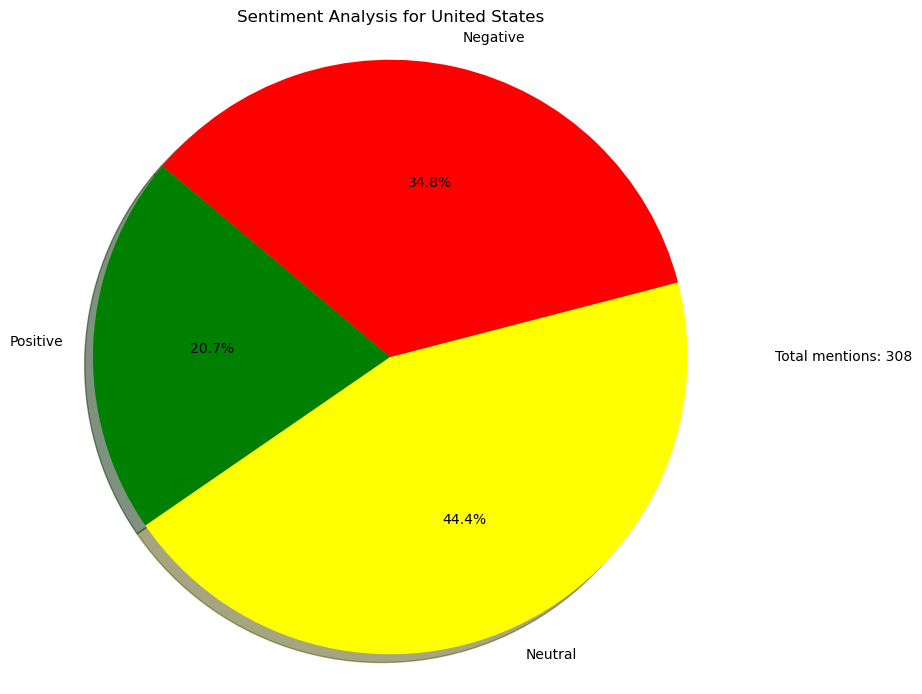

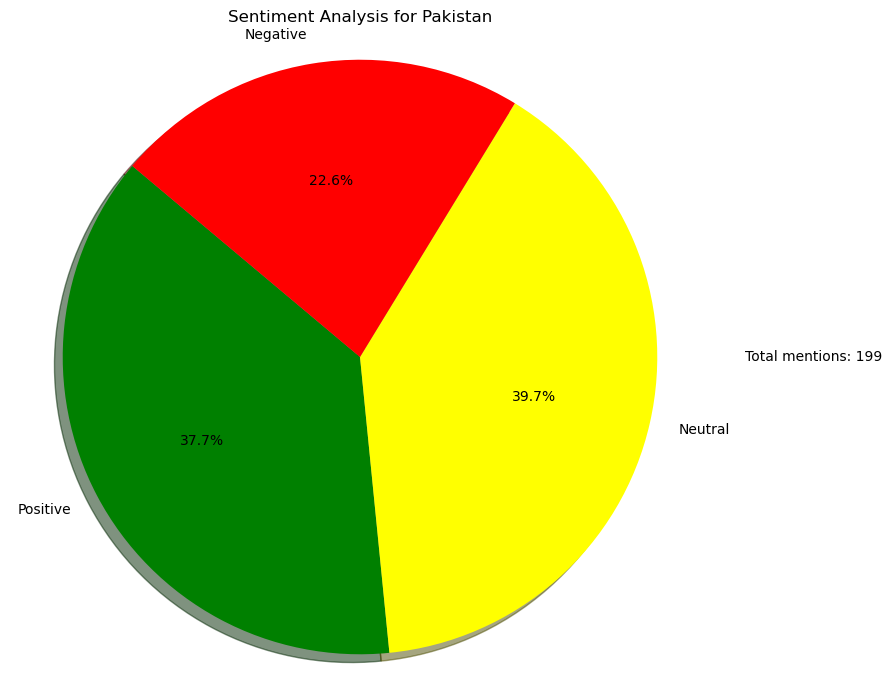

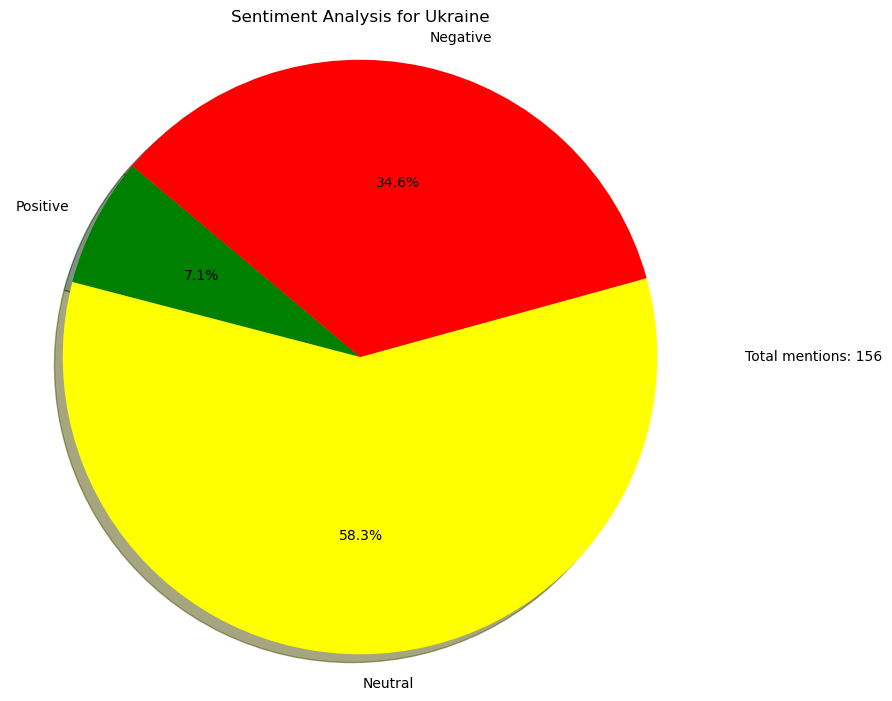

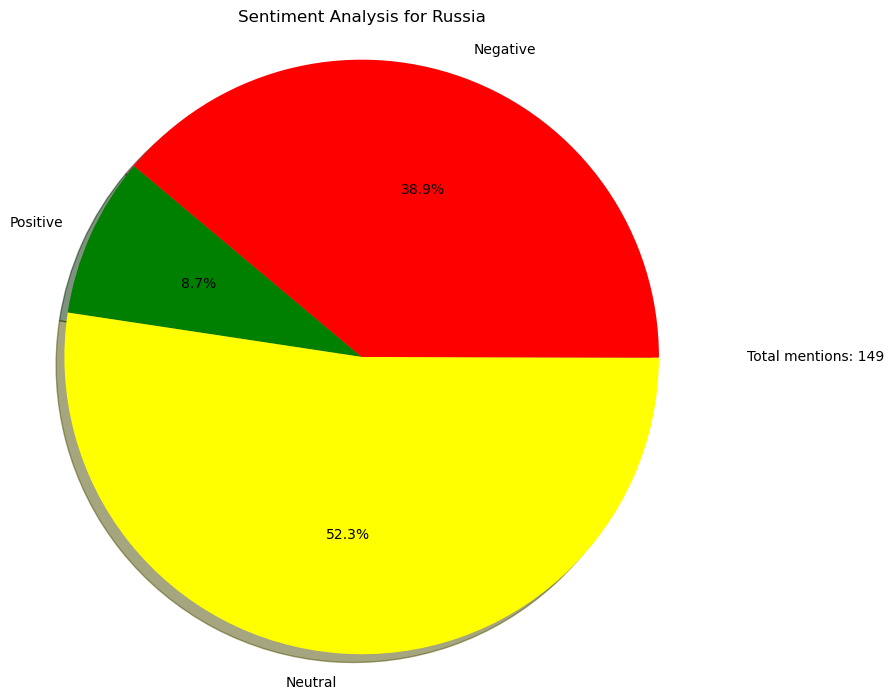

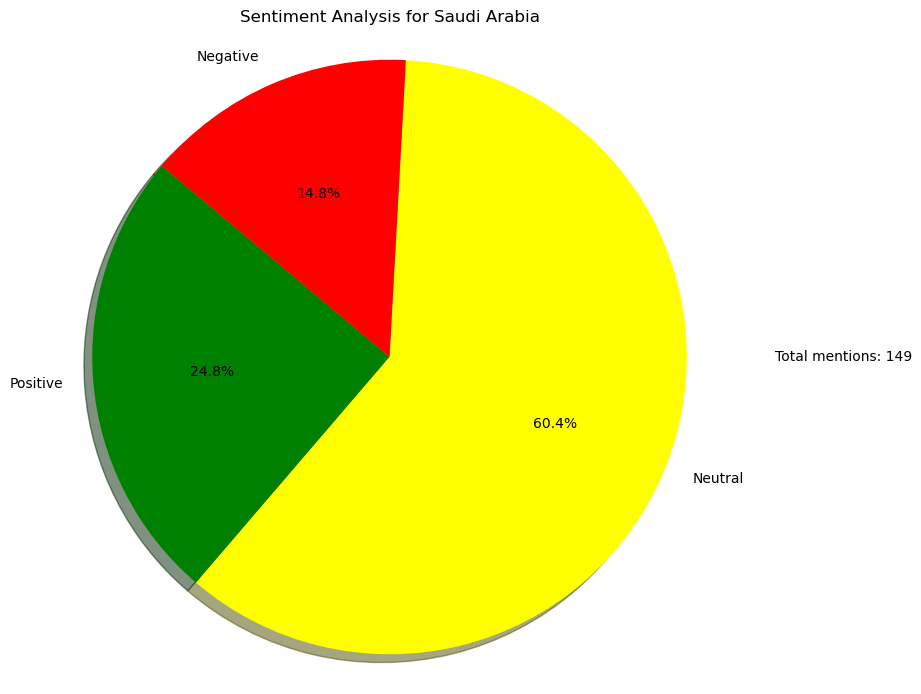

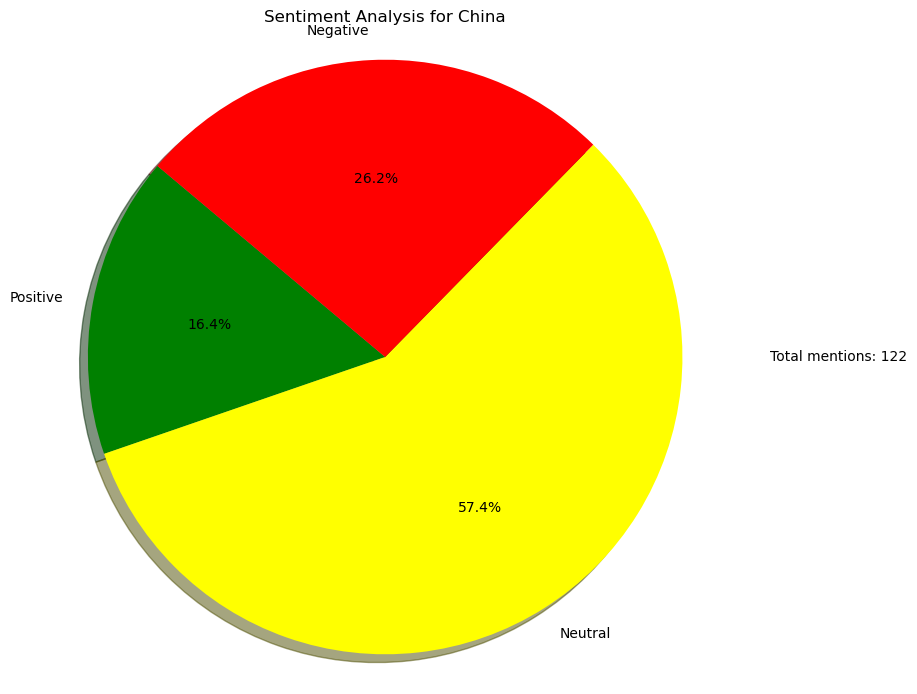

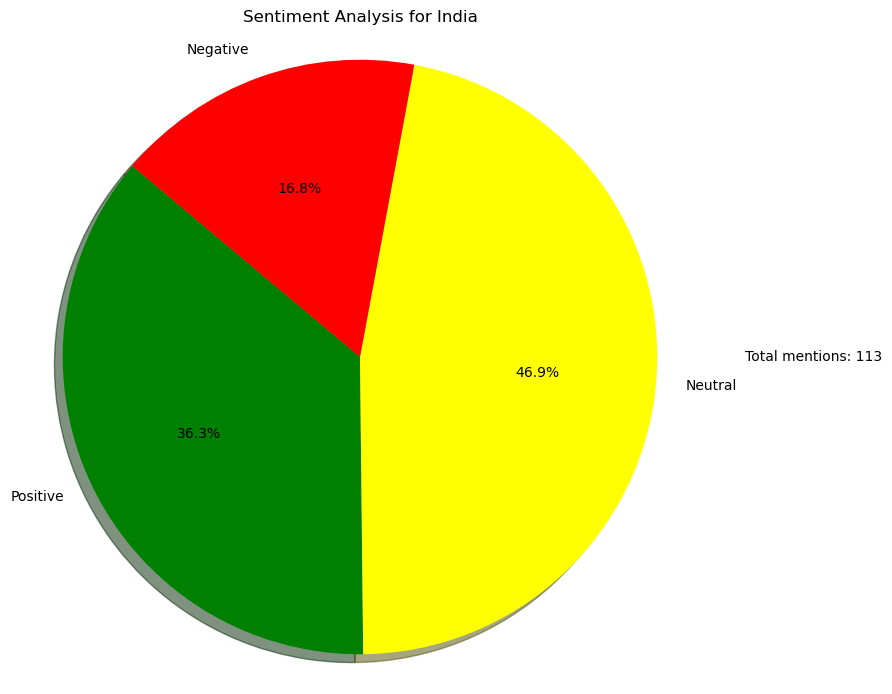

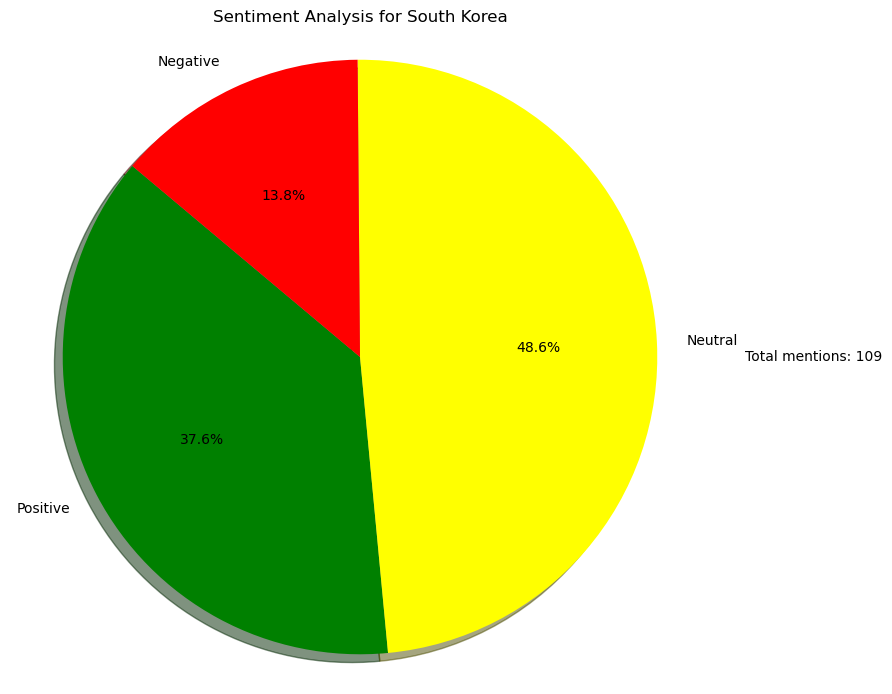

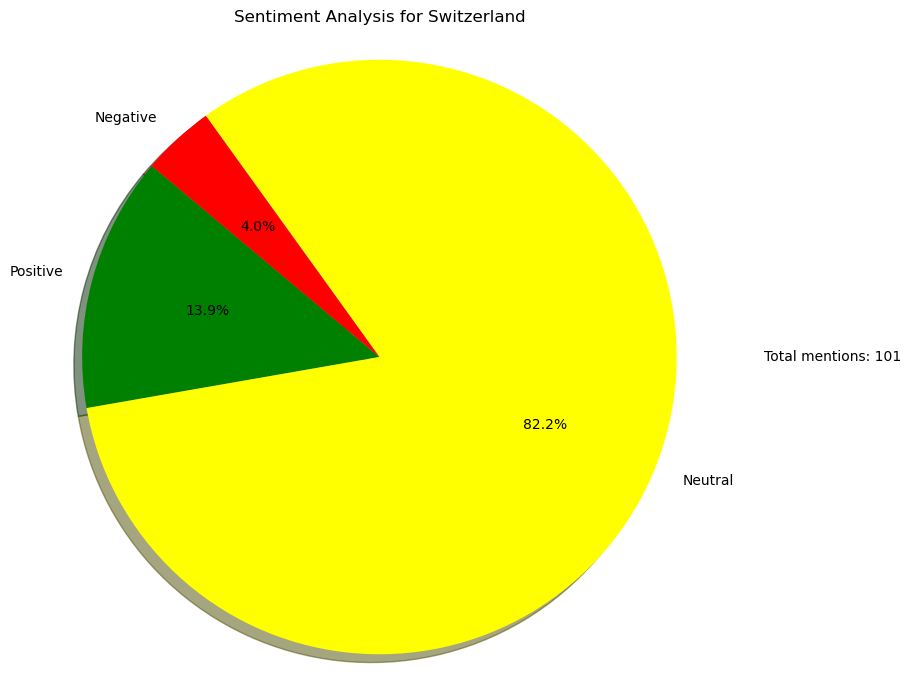

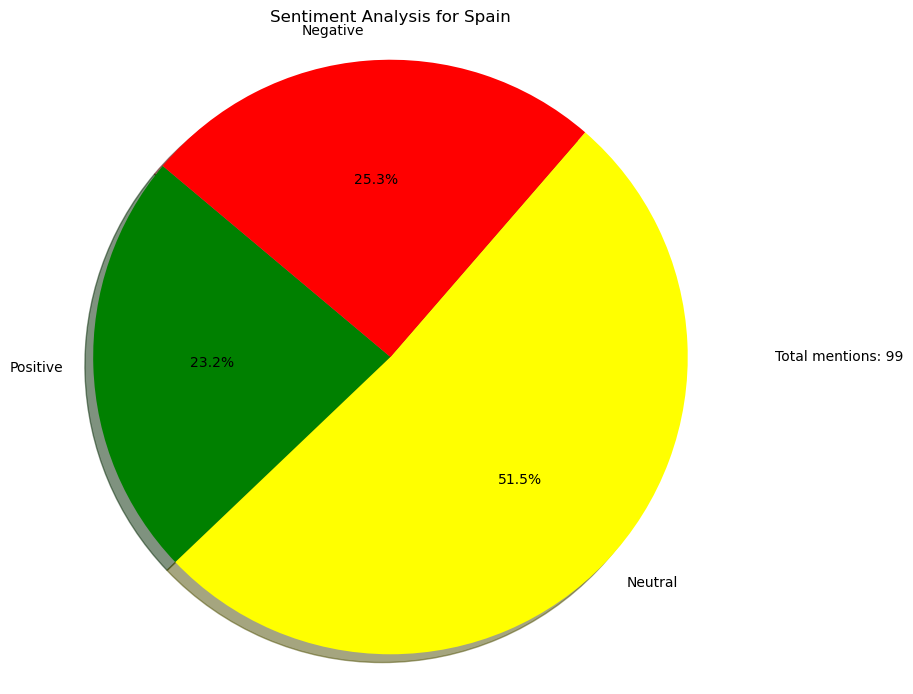

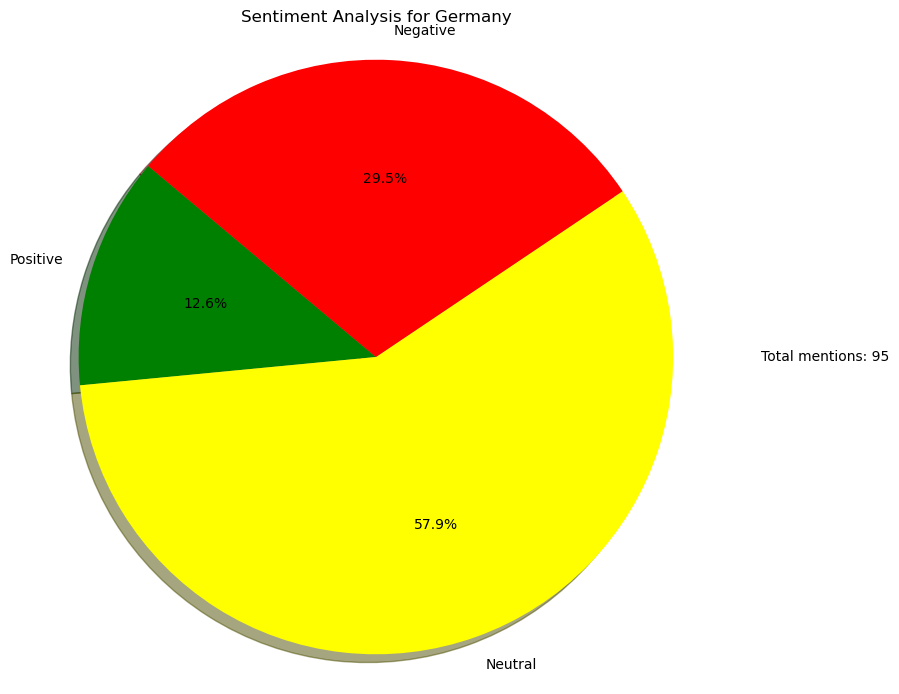

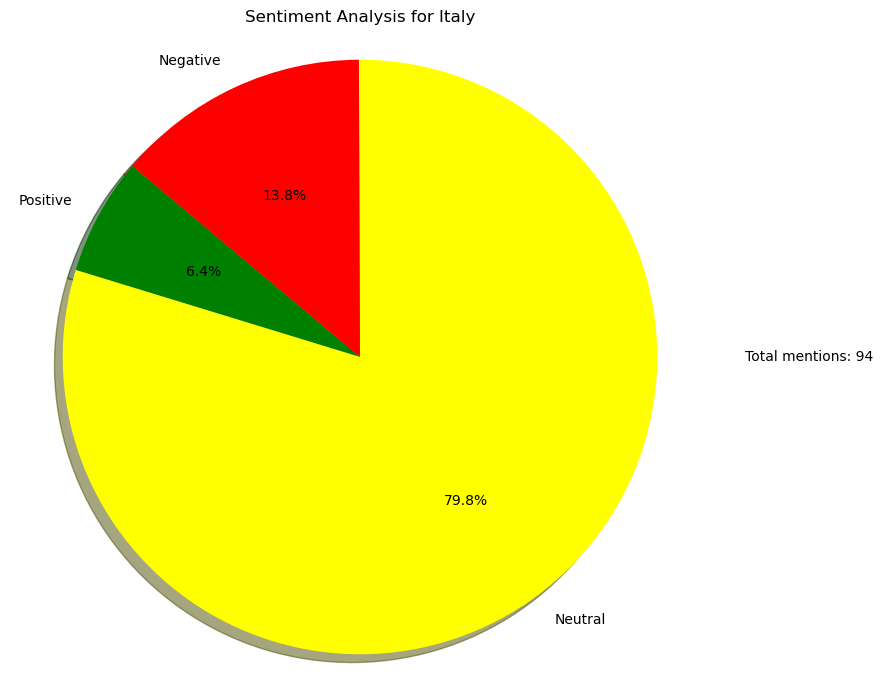

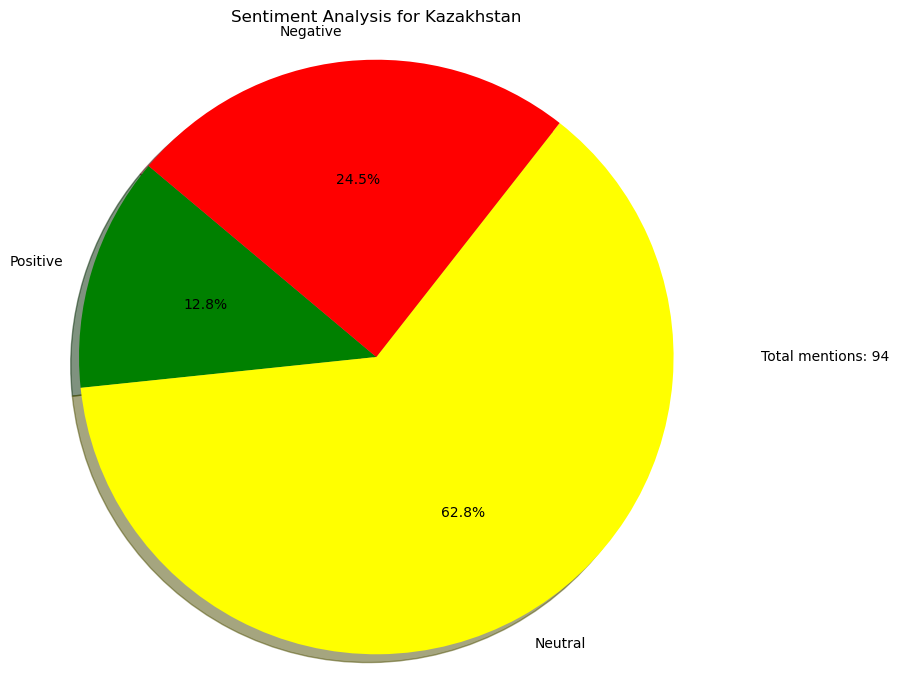

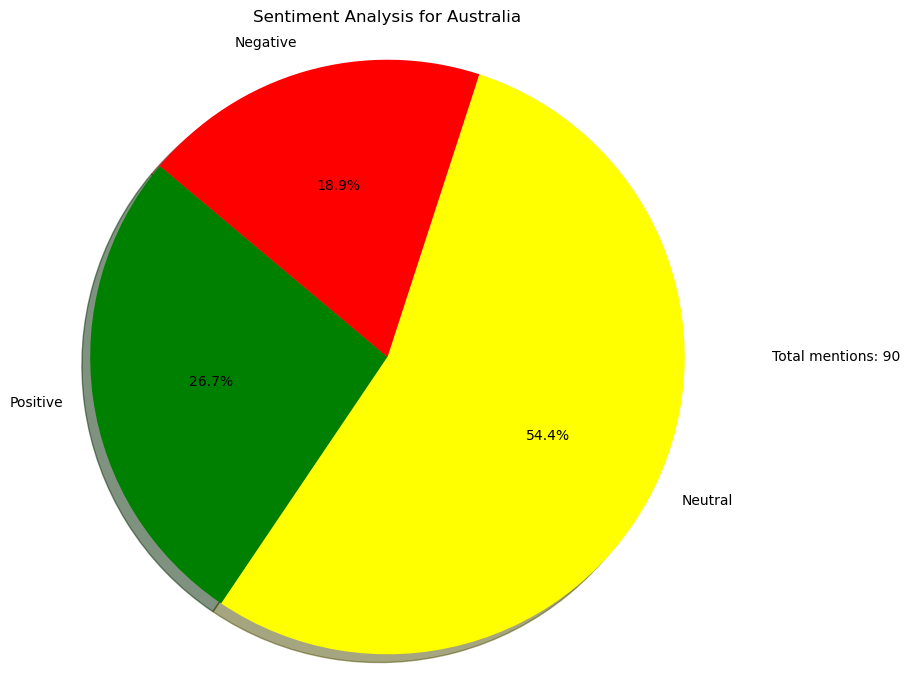

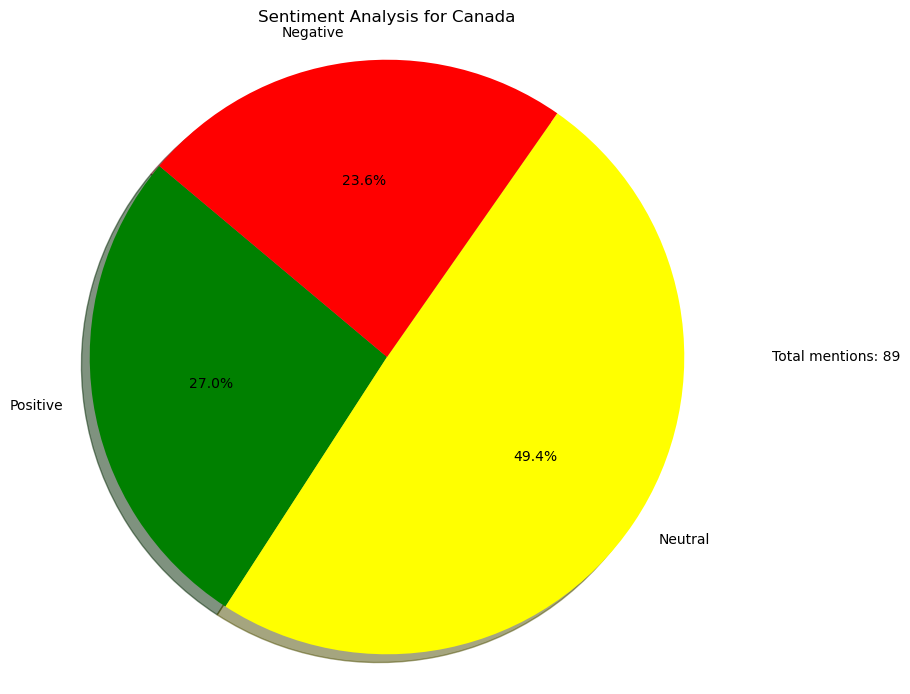

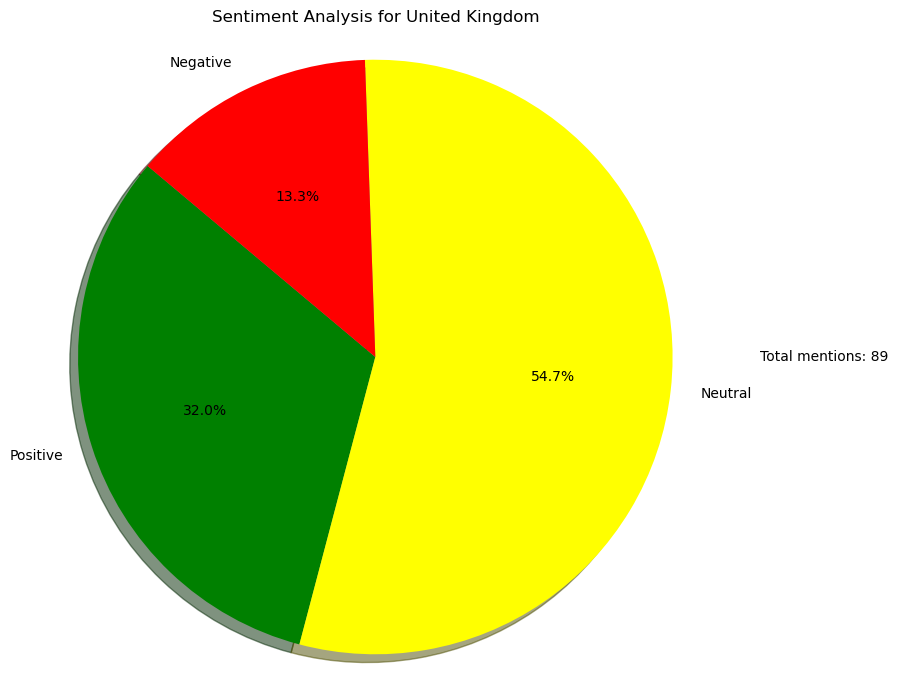

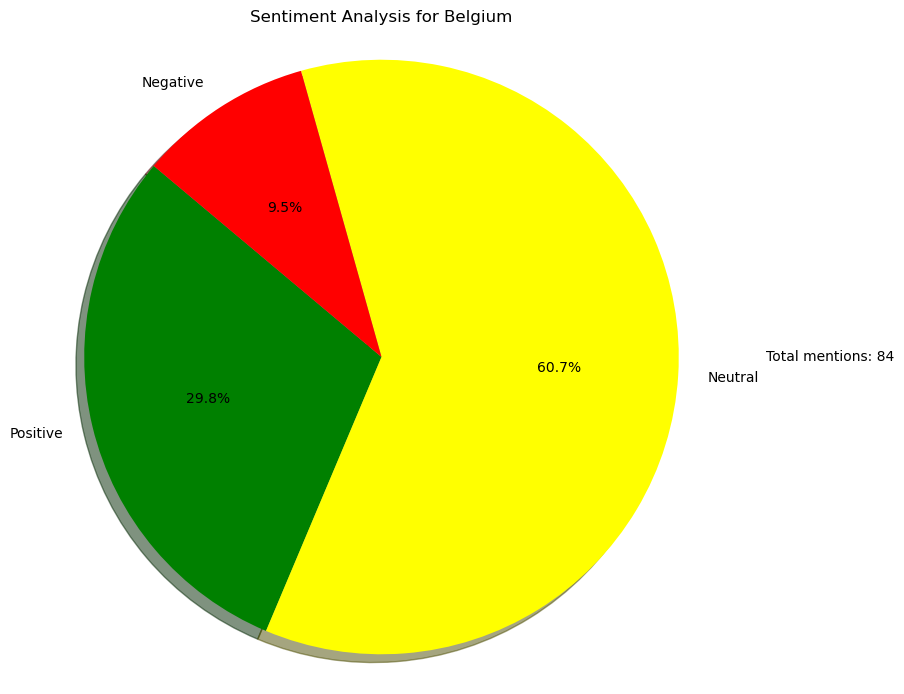

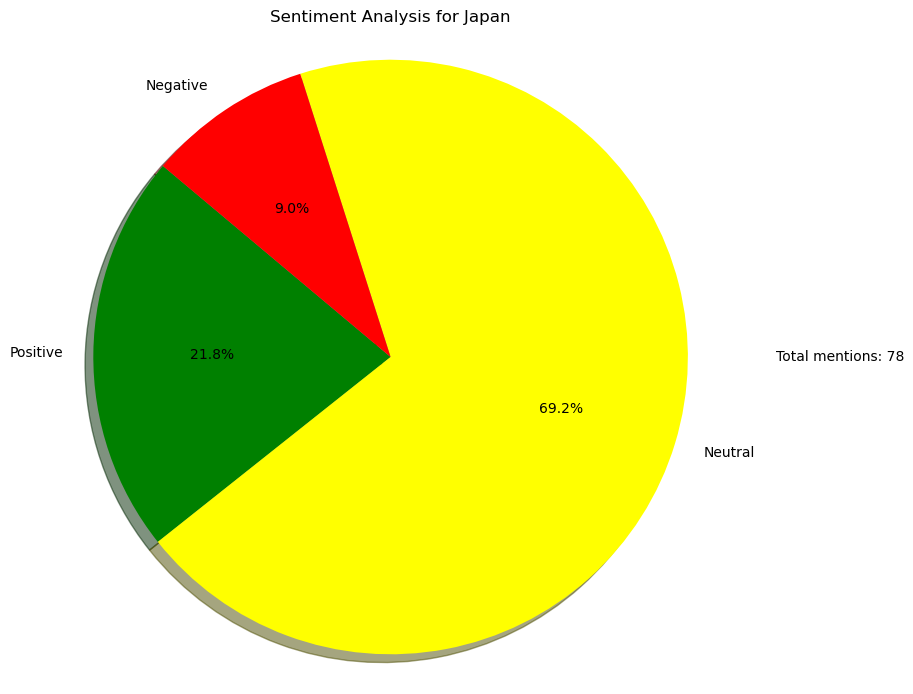

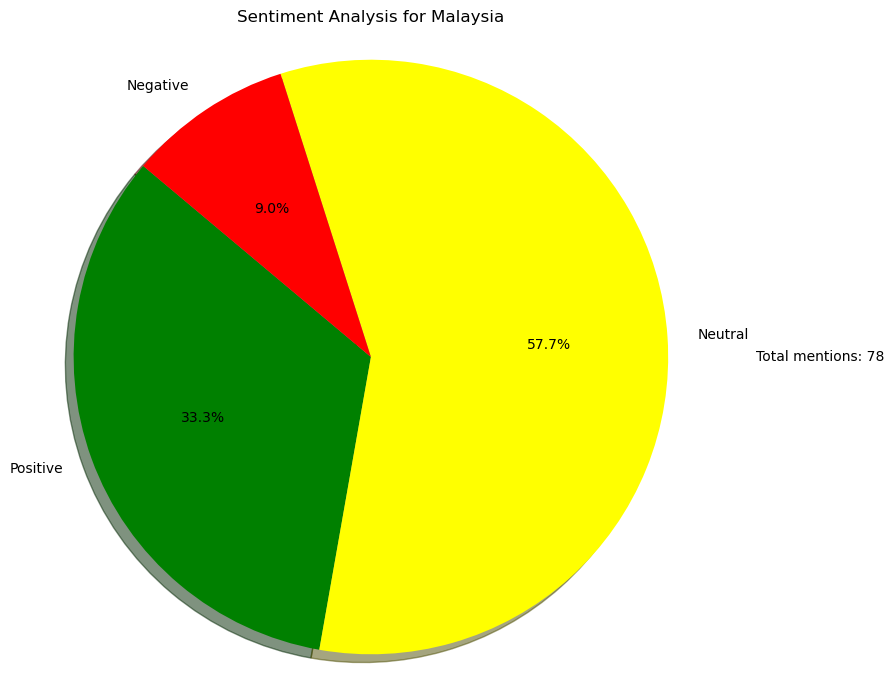

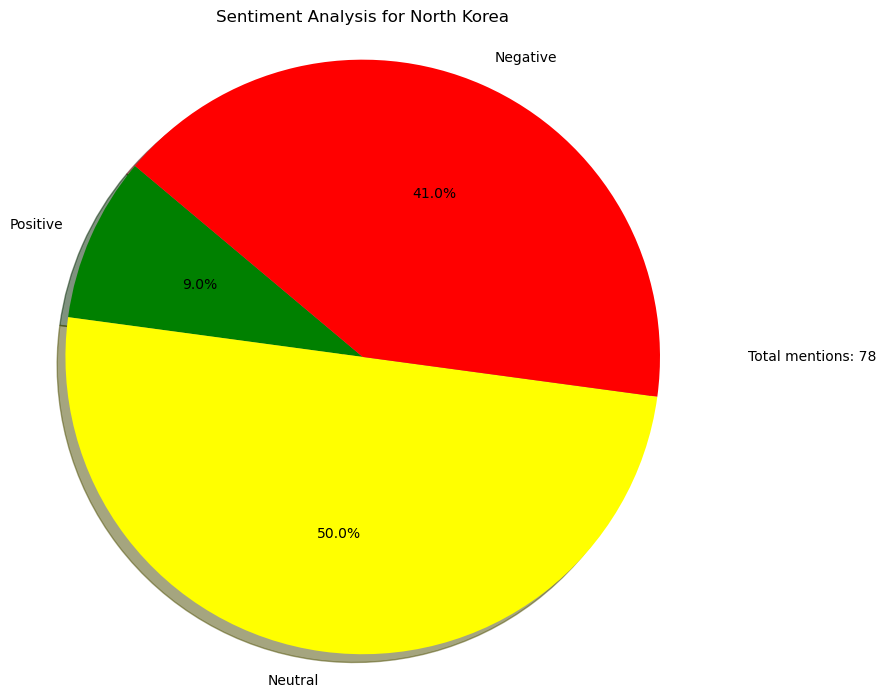

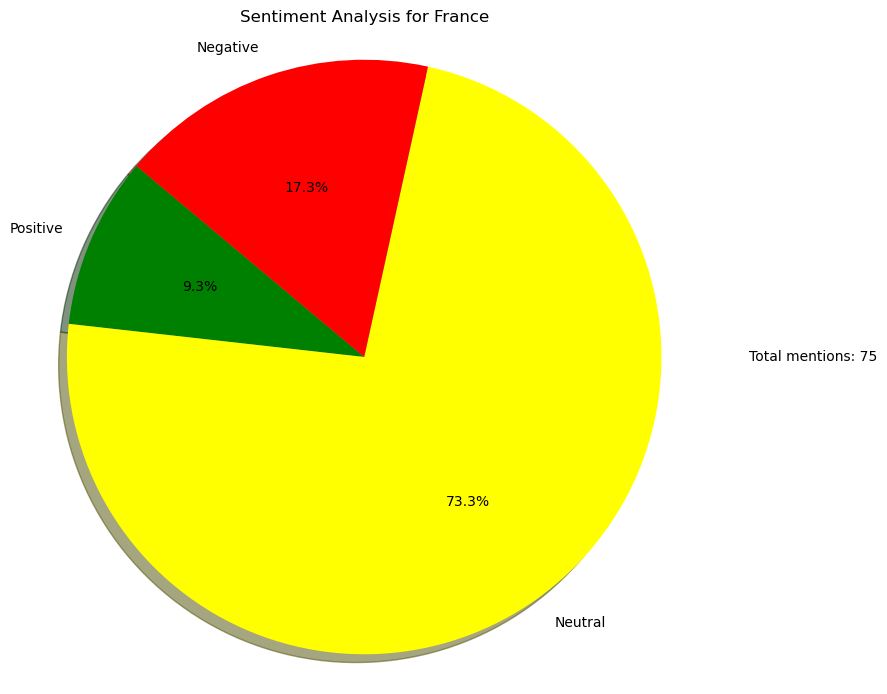

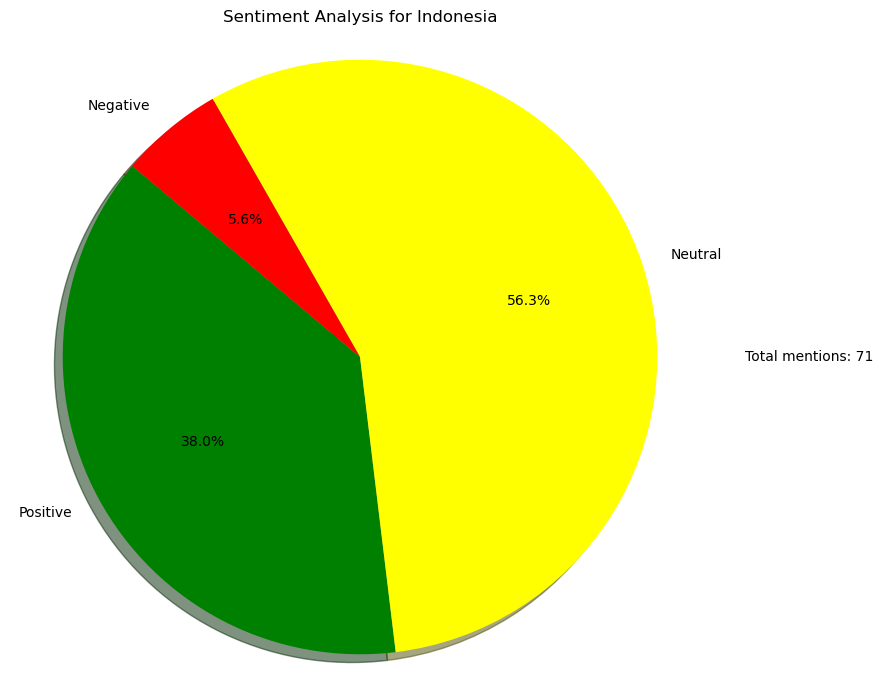

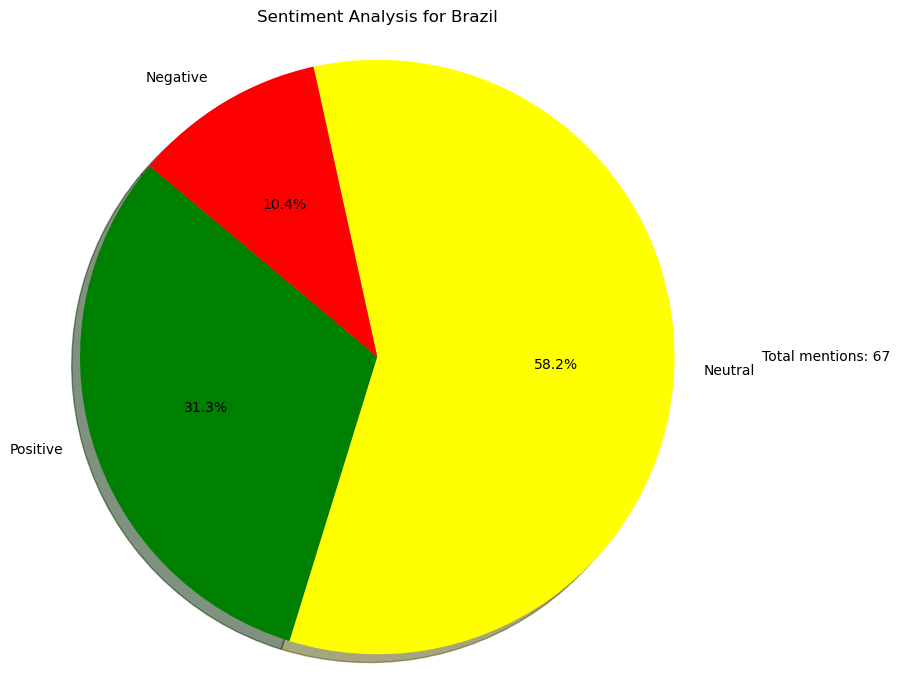

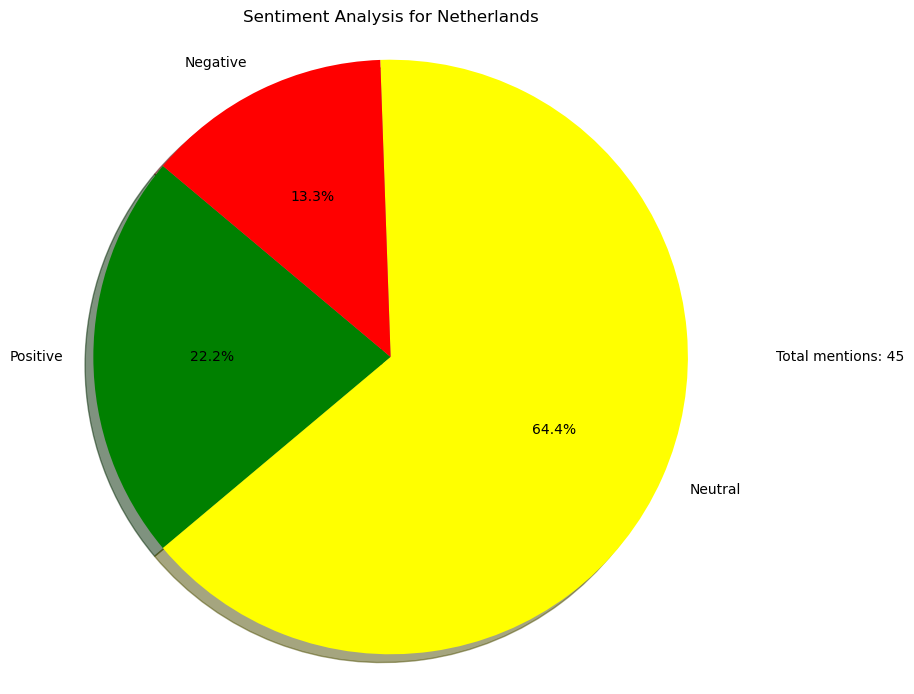

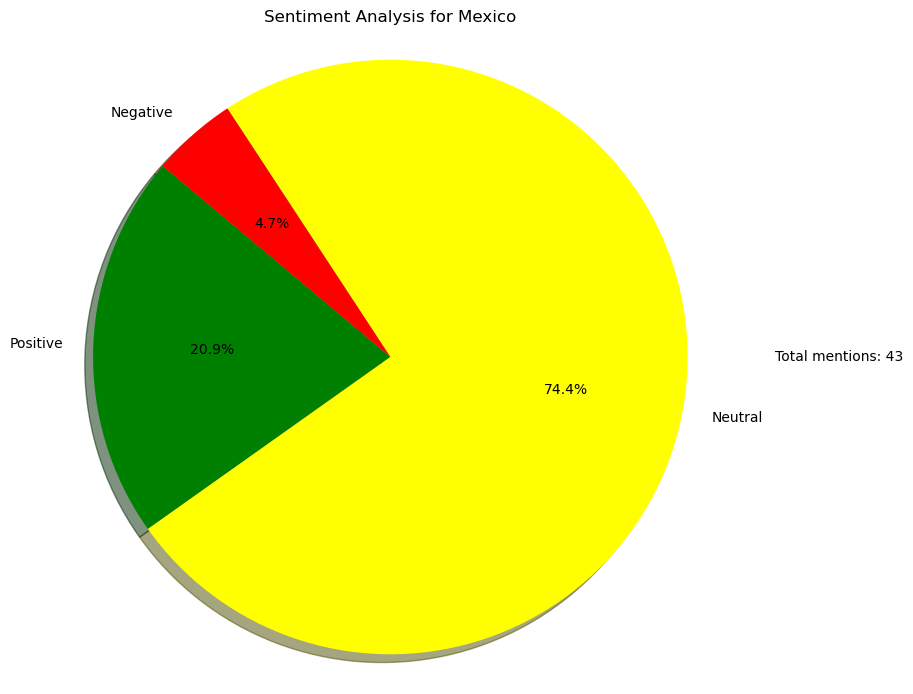

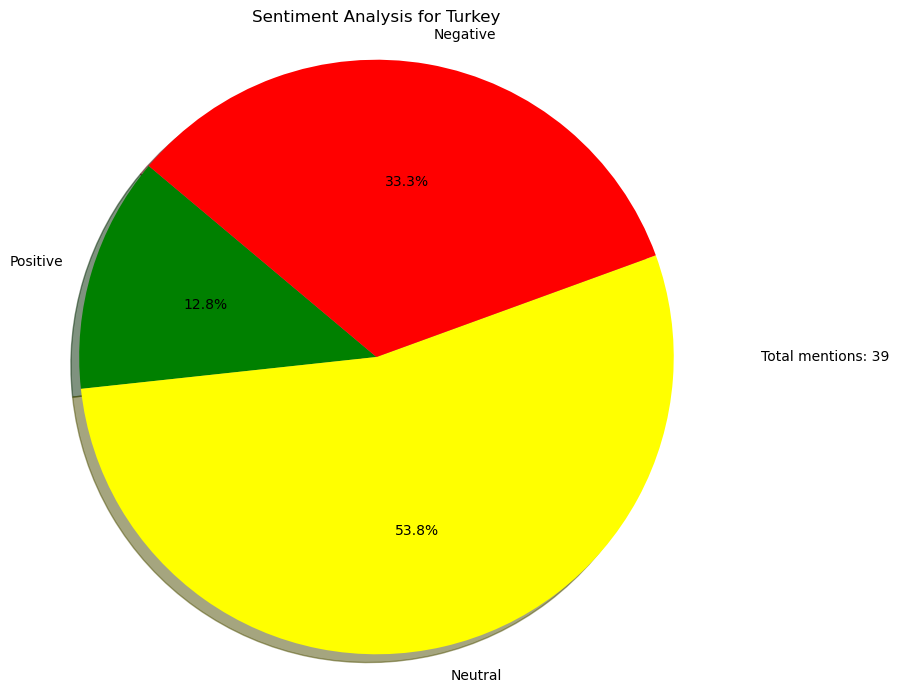

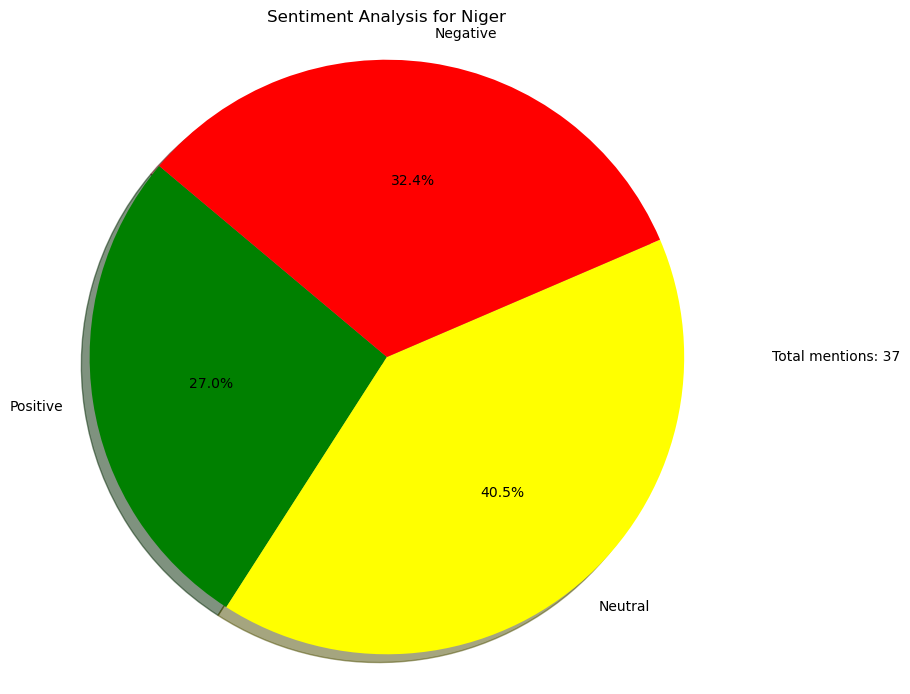

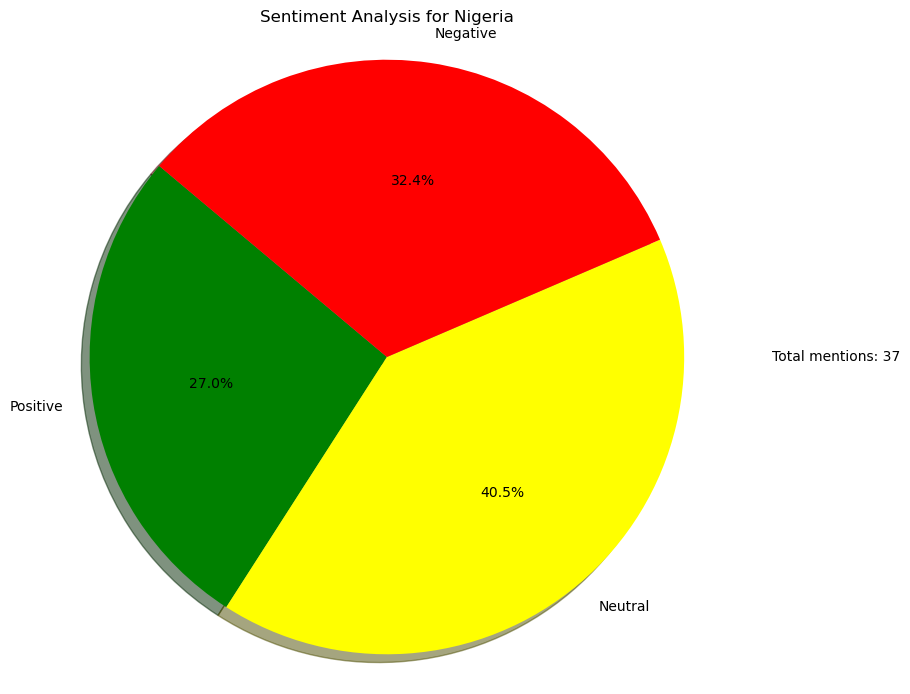

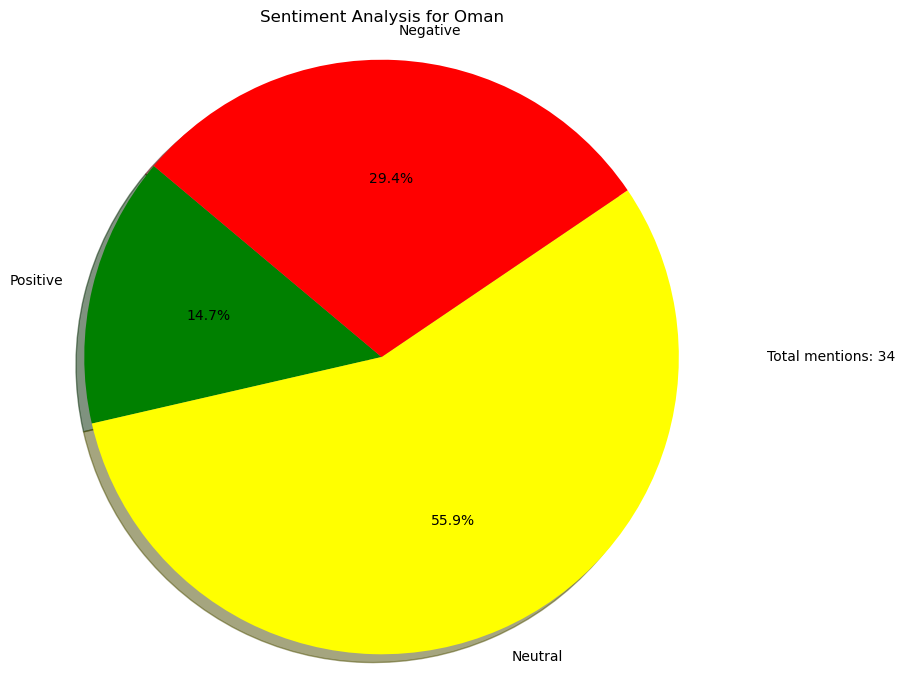

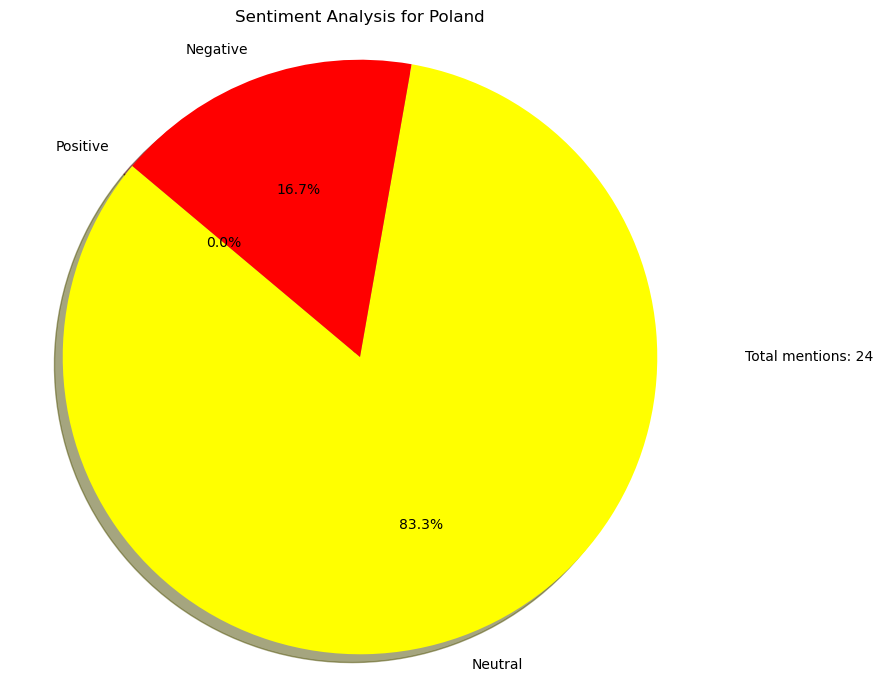

In [30]:
import re
import torch
import logging
import numpy as np
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
from scipy.special import softmax

# To control logging level for various modules used in the application:
def set_global_logging_level(level=logging.ERROR, prefices=[""]):
    prefix_re = re.compile(fr'^(?:{ "|".join(prefices) })')
    for name in logging.root.manager.loggerDict:
        if re.match(prefix_re, name):
            logging.getLogger(name).setLevel(level)
            
set_global_logging_level(logging.ERROR)

# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)

model = AutoModelForSequenceClassification.from_pretrained(MODEL, )

# Dictionary for storing information about the sentiment of tweets by country
sentiment_counts = {country: {'positive': 0, 'neutral': 0, 'negative': 0} for country in country_counts_filtered.keys()}

for tweet in df['Tweet']:
    for country in countries:
        if country.lower() in tweet.lower():
            text = preprocess(tweet)
            encoded_input = tokenizer(text, return_tensors='pt', max_length=512)
            output = model(**encoded_input)
            scores = output[0][0].detach().numpy()
            scores = softmax(scores)

# Get the index of the label with the highest probability
            top_label_index = np.argmax(scores)

# Get the label itself using id2label
            top_label = config.id2label[top_label_index]
            sentiment_counts[country][top_label] += 1
        
# Create pie charts for each country
for country, counts in sentiment_counts.items():
    labels = ['Positive', 'Neutral', 'Negative']
    sizes = [counts['positive'], counts['neutral'], counts['negative']]
    colors = ['green', 'yellow', 'red']

    plt.figure(figsize=(8, 6))
    explode = (0, 0, 0)
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title(f"Sentiment Analysis for {country}")
    plt.subplots_adjust(top= 1.2)
    
    
    # Adjust the position of the Total mentions label
    plt.subplots_adjust(top=1.2, right=1)  # Adjust the 'right' value to control the distance
    
    # Add the Total mentions label
    plt.text(1.05, 0.5, f"Total mentions: {country_counts_filtered[country]}", transform=plt.gca().transAxes, ha="left", va="center")
    
    plt.show()

## Users' countries

I wanted to find out which country had the most tweets from. However, as it turned out, users do not indicate their location as often as I expected. More than half of scraped tweets do not have a location.

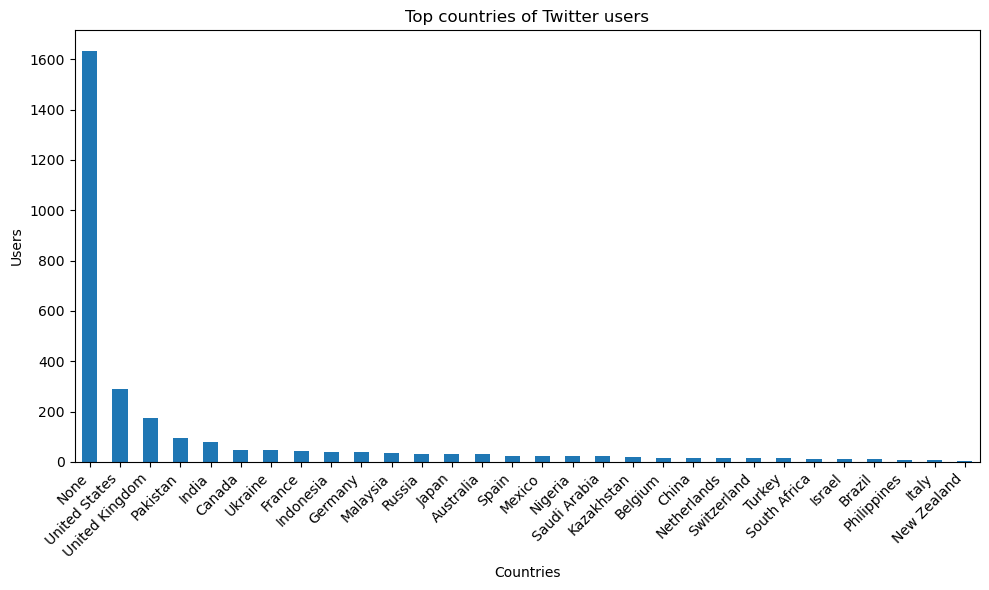

In [20]:
# Count the number of users from each country
country_counts = df['Location'].value_counts()

# Display the top 30 countries
top_n_countries = country_counts.head(30)

plt.figure(figsize=(10, 6))
top_n_countries.plot(kind='bar')
plt.xlabel('Countries')
plt.ylabel('Users')
plt.title('Top countries of Twitter users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Likes comparison

Next, I wanted to find out which posts get more likes, with or without media. In general, there are significantly more posts with media than without. However, in such conditions it is incorrect to make a comparison. Therefore, I do sampling and then compare the average number of likes. When compared this way, the average is not that different. However, in general, we can say for sure that posts with media are more popular.

Average number of likes for media posts before sampling: 1742.8757668711658
Average number of likes for posts without media before sampling: 1123.145299145299


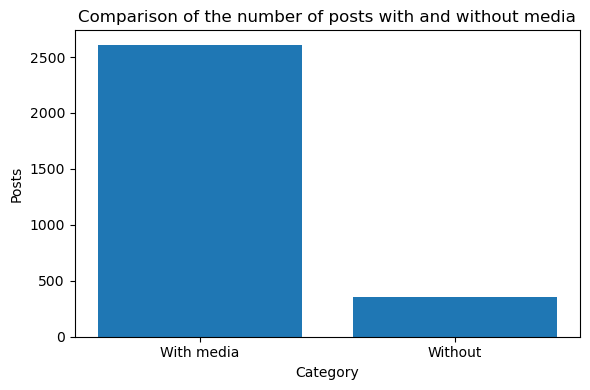

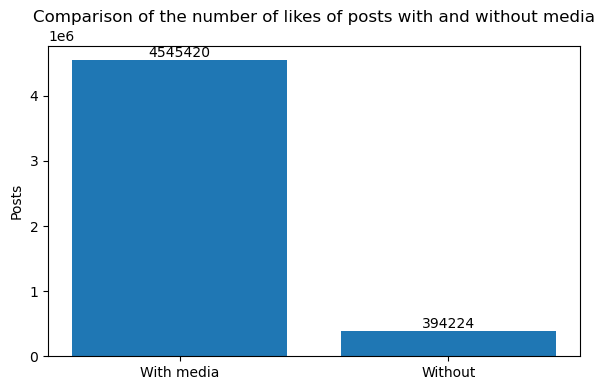

Average number of likes for sampled media posts: 1332.0569800569801
Average number of likes for sampled posts without media: 1123.145299145299


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the average number of likes for posts with and without media
average_likes_with_media = df[df['Media'].notna()]['Likes'].mean()
average_likes_without_media = df[df['Media'].isna()]['Likes'].mean()

print(f"Average number of likes for media posts before sampling: {average_likes_with_media}")
print(f"Average number of likes for posts without media before sampling: {average_likes_without_media}")

# Count the number of posts with and without media
count_with_media = df['Media'].count()  # Посты с медиа
count_without_media = df['Media'].isna().sum()  # Посты без медиа (где Media имеет значение None)

plt.figure(figsize=(6, 4))
plt.bar(['With media', 'Without'], [count_with_media, count_without_media])
plt.xlabel('Category')
plt.ylabel('Posts')
plt.title('Comparison of the number of posts with and without media')
plt.tight_layout()
plt.show()

# Calculate the sum of likes for posts with media and posts without media
likes_with_media = df[df['Media'].notna()]['Likes'].sum()
likes_without_media = df[df['Media'].isna()]['Likes'].sum()

plt.figure(figsize=(6, 4))
plt.bar(['With media', 'Without'], [likes_with_media, likes_without_media])
plt.text(0, likes_with_media, f'{likes_with_media}', ha='center', va='bottom')
plt.text(1, likes_without_media, f'{likes_without_media}', ha='center', va='bottom')
plt.ylabel('Posts')
plt.title('Comparison of the number of likes of posts with and without media')
plt.tight_layout()
plt.show()

posts_with_media = df[df['Media'].notna()]
posts_without_media = df[df['Media'].isna()]

# Sample both subsamples so that the number of posts is the same
sample_size = min(len(posts_with_media), len(posts_without_media))
sampled_posts_with_media = posts_with_media.sample(sample_size, random_state=42)
sampled_posts_without_media = posts_without_media.sample(sample_size, random_state=42)

# Compare sampled subsamples
average_likes_with_media_sampled = sampled_posts_with_media['Likes'].mean()
average_likes_without_media_sampled = sampled_posts_without_media['Likes'].mean()

print(f"Average number of likes for sampled media posts: {average_likes_with_media_sampled}")
print(f"Average number of likes for sampled posts without media: {average_likes_without_media_sampled}")

## Word Cloud

Word Cloud is a quite popular representation of text data, so I decided to add it. Using an image of the Twitter logo, I create a mask in the shape of which a cloud is formed. It's important to note that the image must have a background, otherwise it won't work.

In [16]:
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Create an empty list to store text messages without links.

raw_tweets = []

# STOPWORDS = [
#     'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your',
#     'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her',
#     'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs',
#     'themselves', 'what', 'which', 'who', 'would', 'whom', 'this', 'that', 'these', 'those',
#     'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
#     'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
#     'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with',
#     'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',
#     'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over',
#     'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where',
#     'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other',
#     'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too',
#     'very', 't', 'can', 'will', 'just', 'don', 'should', 'now'
# ]

# Go through each tweet in the 'Tweets' column
for tweet in df['Tweet']:
    raw_tweets.append(tweet)

raw_string = ''.join(raw_tweets)
no_links = re.sub(r'http\S+', '', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)

words = no_special_characters.split(" ")
words = [w for w in words if len(w) > 2] 
words = [w.lower() for w in words]

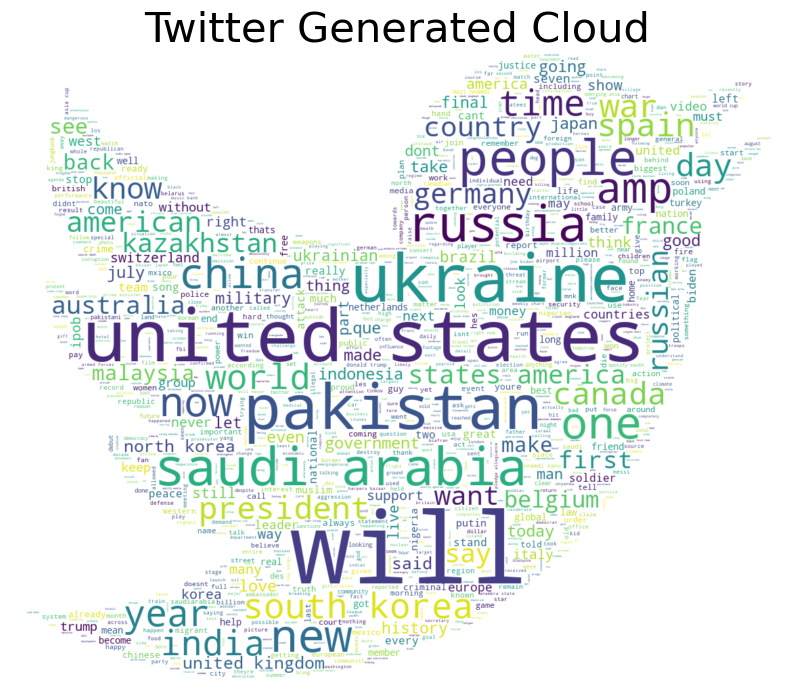

In [20]:
import re
from PIL import Image
from wordcloud import WordCloud
from IPython.display import Image as im

# Creating a mask
mask = np.array(Image.open('/Users/Faon/Desktop/Twitter-logo.png')) 

wc = WordCloud(background_color="white", max_words=2000, mask=mask, stopwords=STOPWORDS, relative_scaling=1)
wc.generate(','.join(words))

f = plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.title('Twitter Generated Cloud', size=30)
plt.axis("off")
plt.show()

# Future work

## Translate tweets

Regardless of the fact I set the English language before scraping, some of the posts were written in different languages. Thus, I wanted to translate them. I use the langid library to detect non-English tweets and then use facebook/m2m100_418M model to translate them. At first I tried to use some liraries, but they have limit of requests per day. I decided to refuse it since this is really ineffective. Some posts can have a few languages or be not translated correctly, plus it takes a huge amount of time to process.


In [ ]:
# !pip install langid

In [ ]:
import langid
import torch
from transformers import pipeline

# Creating a Text2TextGenerationPipeline for language translation 
pipe = pipeline(task='text2text-generation', model='facebook/m2m100_418M')

for tweet in df['Tweet']:
    if langid.classify(tweet)[0] != 'en':
        tweet = (pipe(tweet, forced_bos_token_id=pipe.tokenizer.get_lang_id(lang='en')))


## More accurate country detection

Sometimes users indicate coordinates and flag emoji as a location. Not very often, but this data could be used. There are libraries that allow you to define them, such as <a href="https://pypi.org/project/emoji-country-flag/">emoji-country-flag</a>. Another thing about location detection which could be improved is some users write their actual countries but with special fonts which makes it difficult to detect the text.